几何变换

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

In [2]:
filename = 'D:\code\pytorch_learn\data\mao.jpg'

(900, 900, 3)
(450, 450, 3)
(720, 1080, 3)


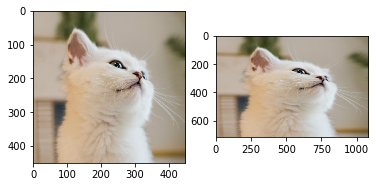

In [21]:
img = np.array(Image.open(filename))
print(img.shape)
w, h = img.shape[:2]

img2 = cv2.resize(img, (int(w/2), int(h/2)))  # 缩放图像
print(img2.shape)
plt.subplot(1, 2, 1); plt.imshow(img2)

img3 = cv2.resize(img, None, fx=1.2, fy=0.8)  # fx 是水平方向即列数, fy 是垂直方向即行数
print(img3.shape)
plt.subplot(1, 2, 2); plt.imshow(img3)

plt.show()

插值方式
![插值方式](https://res.weread.qq.com/wrepub/epub_26297910_152)

当缩小图像时，使用区域插值方式（INTER_AREA）能够得到最好的效果；当放大图像时，使用三次样条插值（INTER_CUBIC）方式和双线性插值（INTER_LINEAR）方式都能够取得较好的效果。三次样条插值方式速度较慢，双线性插值方式速度相对较快且效果并不逊色。

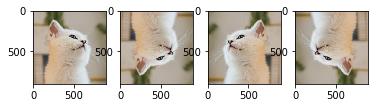

In [24]:
img = np.array(Image.open(filename))
plt.subplot(1, 4, 1); plt.imshow(img)

img2 = cv2.flip(img, 0)  # x 轴翻转
plt.subplot(1, 4, 2); plt.imshow(img2)

img3 = cv2.flip(img, 1)  # y 轴翻转
plt.subplot(1, 4, 3); plt.imshow(img3)

img4 = cv2.flip(img, -1)  # xy 轴同时翻转
plt.subplot(1, 4, 4); plt.imshow(img4)

plt.show()

翻转参数
![翻转参数](https://res.weread.qq.com/wrepub/epub_26297910_153)

仿射变换是指图像可以通过一系列的几何变换来实现平移、旋转等多种操作.

OpenCV中的仿射函数为cv2.warpAffine()，其通过一个变换矩阵（映射矩阵）M实现变换，具体为：

dst（x, y）=src（M11x+M12y+M13, M21x+M22y+M23）

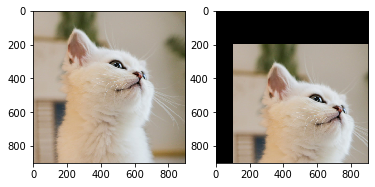

In [41]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

h, w, c = img.shape

# 平移
x = 100
y = 200
M = np.float32([[1, 0, x], [0, 1, y]])
move = cv2.warpAffine(img, M, (w, h))  # 注意, 这边需要的是 W*H, 而 numpy 中是 HWC
plt.subplot(1, 2, 2); plt.imshow(move)

plt.show()

在使用函数cv2.warpAffine()对图像进行旋转时，可以通过函数cv2.getRotationMatrix2D()获取转换矩阵.

(900, 900, 3) (900, 900, 3)


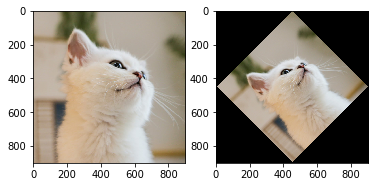

In [43]:
# img = np.array(Image.open(r'D:\code\pytorch_learn\data\1803151818-00000077.png'))
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

# 获取旋转矩阵
M = cv2.getRotationMatrix2D((img.shape[0]/2, img.shape[1]/2), 45, 0.7)
rotate = cv2.warpAffine(img, M, img.shape[:2][::-1])  # 注意, 这边需要的是 W*H, 而 numpy 中是 HWC
plt.subplot(1, 2, 2); plt.imshow(rotate)
print(img.shape, rotate.shape)

plt.show()

对于更复杂仿射变换，OpenCV提供了函数cv2.getAffineTransform()来生成仿射函数cv2.warpAffine()所使用的转换矩阵M.

src和dst中的三个点分别对应平行四边形的左上角、右上角、左下角三个点.

(800, 600, 4)
(800, 600, 4)


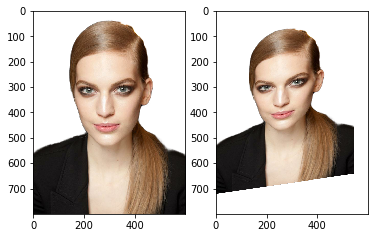

In [45]:
img = np.array(Image.open(r'D:\code\pytorch_learn\data\1803151818-00000077.png'))
plt.subplot(1, 2, 1); plt.imshow(img)

print(img.shape)
h, w, c = img.shape

# 仿射变换
p1 = np.float32([[0, 0], [w-1, 0], [0, h-1]])
p2 = np.float32([[0, h*0.1], [w*0.9, 0], [0, h*0.9]])
M = cv2.getAffineTransform(p1, p2)
dst = cv2.warpAffine(img, M, (w, h))
plt.subplot(1, 2, 2); plt.imshow(dst)
print(dst.shape)

plt.show()

仿射变换可以将矩形映射为任意平行四边形，透视变换则可以将矩形映射为任意四边形。

可以使用一个函数来生成函数cv2.warpPerspective()所使用的转换矩阵, 该函数是cv2.getPerspectiveTransform().

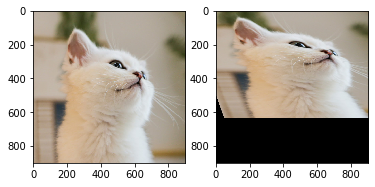

In [52]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

h, w, c = img.shape

# 透视变换
p1 = np.float32([[150, 50], [400, 50], [60, 450], [310, 450]])
p2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(p1, p2)
dst = cv2.warpPerspective(img, M, (w, h))
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

把一幅图像内的像素点放置到另外一幅图像内的指定位置，这个过程称为重映射.

重映射通过修改像素点的位置得到一幅新图像。在构建新图像时，需要确定新图像中每个像素点在原始图像中的位置。因此，映射函数的作用是查找新图像像素在原始图像内的位置。该过程是将新图像像素映射到原始图像的过程，因此被称为反向映射。在函数cv2.remap()中，参数map1和参数map2用来说明反向映射，map1针对的是坐标x, map2针对的是坐标y。

我们想将目标图像（映射结果图像）中某个点A映射为原始图像内处于第0行第3列上的像素点B，那么需要将A点所对应的参数map1对应位置上的值设为3，参数map2对应位置上的值设为0.

In [57]:
np.random.seed(100)
img = np.random.randint(0, 256, size=[4, 5], dtype=np.uint8)
rows, cols = img.shape  # h, w = img.shape
# x = w = col
# y = h = row
# 所以取点的坐标是 (0, 3) 即 (row, col) 即 (h, w) 即 (y, x)
mapx = np.full(img.shape, 3, np.float32)
mapy = np.full(img.shape, 0, np.float32)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
print(img)
print(mapx)
print(mapy)
print(dst)  # 所有的值都来自于 (0, 3) 上的值  坐标系的原点是左上角, x 表示宽度 cols, y 表示高度 rows

[[  8 150  28 139  24]
 [219 208 171  67  55]
 [ 67  71 103 223 123]
 [105  87  47 173 108]]
[[3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[139 139 139 139 139]
 [139 139 139 139 139]
 [139 139 139 139 139]
 [139 139 139 139 139]]


在映射时，将参数进行如下处理：

* 将map1的值设定为对应位置上的x轴坐标值。
* 将map2的值设定为对应位置上的y轴坐标值。

通过上述处理后，可以让函数cv2.remap()实现图像复制.

In [66]:
np.random.seed(0)
img = np.random.randint(0, 256, size=[4, 5], dtype=np.uint8)
rows, cols = img.shape
mapx = np.zeros(img.shape, np.float32)
mapy = np.zeros(img.shape, np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), j)
        mapy.itemset((i, j), i)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
print(img)
print(mapx)
print(mapy)
print(dst)

[[172  10 127 140  47]
 [170 196 151 117 166]
 [ 22 183 192 204  33]
 [216  67 179  78 154]]
[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]
[[172  10 127 140  47]
 [170 196 151 117 166]
 [ 22 183 192 204  33]
 [216  67 179  78 154]]


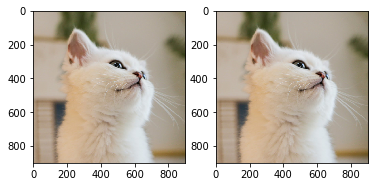

In [69]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

rows, cols = img.shape[:2]

mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), j)
        mapy.itemset((i, j), i)

dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

如果想让图像绕着x轴翻转，意味着在映射过程中：

* x坐标轴的值保持不变。
* y坐标轴的值以x轴为对称轴进行交换。

In [61]:
img = np.random.randint(0, 255, size=[4, 5], dtype=np.uint8)
rows, cols = img.shape
mapx = np.zeros(img.shape, np.float32)
mapy = np.zeros(img.shape, np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), j)
        mapy.itemset((i, j), rows-1-i)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
print(img)
print(mapx)
print(mapy)
print(dst)

[[251  82 162 219 195]
 [118 125 139 103 125]
 [229 216   9 164 116]
 [108 211 222 161 159]]
[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
[[108 211 222 161 159]
 [229 216   9 164 116]
 [118 125 139 103 125]
 [251  82 162 219 195]]


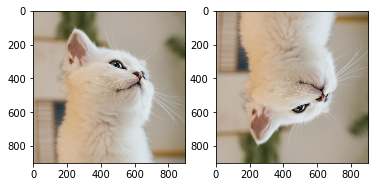

In [70]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

rows, cols = img.shape[:2]

mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), j)
        mapy.itemset((i, j), rows-1-i)

dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

如果想让图像绕着y轴翻转，意味着在映射过程中：

* y坐标轴的值保持不变。
* x坐标轴的值以y轴为对称轴进行交换。

In [63]:
img = np.random.randint(0, 255, size=[4, 5], dtype=np.uint8)
rows, cols = img.shape
mapx = np.zeros(img.shape, np.float32)
mapy = np.zeros(img.shape, np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), cols-1-j)
        mapy.itemset((i, j), i)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
print(img)
print(mapx)
print(mapy)
print(dst)

[[216 189 132  14  88]
 [154 178 246 140 205]
 [204  69  58  57  41]
 [ 98 193  66  72 122]]
[[4. 3. 2. 1. 0.]
 [4. 3. 2. 1. 0.]
 [4. 3. 2. 1. 0.]
 [4. 3. 2. 1. 0.]]
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]
[[ 88  14 132 189 216]
 [205 140 246 178 154]
 [ 41  57  58  69 204]
 [122  72  66 193  98]]


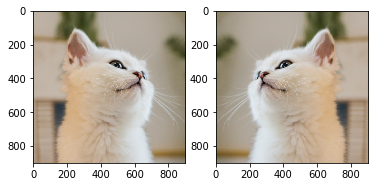

In [71]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

rows, cols = img.shape[:2]

mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), cols-1-j)
        mapy.itemset((i, j), i)

dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

如果想让图像绕着x轴、y轴翻转，意味着在映射过程中：

* x坐标轴的值以y轴为对称轴进行交换。
* y坐标轴的值以x轴为对称轴进行交换。

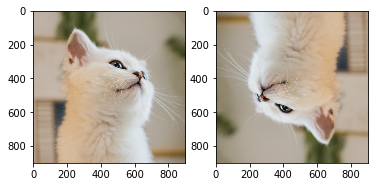

In [72]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

rows, cols = img.shape[:2]

mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), cols-1-j)
        mapy.itemset((i, j), rows-1-i)

dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

如果想让图像的x轴、y轴互换，意味着在映射过程中，对于任意一点，都需要将其x轴、y轴坐标互换。反映在mapx和mapy上：

- mapx的值调整为所在行的行号。
- mapy的值调整为所在列的列号。

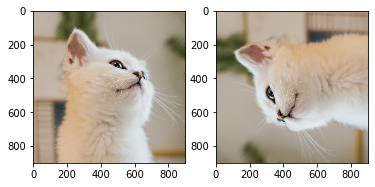

In [74]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

rows, cols = img.shape[:2]

mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i, j), i)
        mapy.itemset((i, j), j)

dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

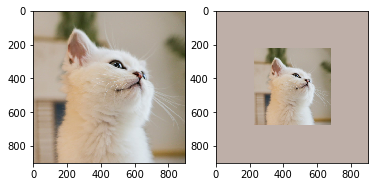

In [88]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

rows, cols = img.shape[:2]

mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        if 0.25<i/rows<0.75 and 0.25<j/cols<0.75:
            mapx.itemset((i, j), 2*(j-cols*0.25) + 0.5)
            mapy.itemset((i, j), 2*(i-rows*0.25) + 0.5)
        else:
            mapx.itemset((i, j), 0)
            mapy.itemset((i, j), 0)

dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()